## Task 2: Develop Time Series Forecasting Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
# Load the preprocessed data
df_TSLA = pd.read_csv('../data/processed/TSLA_processed.csv')
df_BND = pd.read_csv('../data/processed/BND_processed.csv')
df_SPY = pd.read_csv('../data/processed/SPY_processed.csv')

In [4]:
df_TSLA.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Return,MA20,MA50,MA200,Volatility
0,2015-01-02 00:00:00-05:00,14.858000,14.883333,14.217333,14.620667,71466000,0.0,0.0,0.001888,111.99765,111.78539,111.683747,0.522383
1,2015-01-05 00:00:00-05:00,14.303333,14.433333,13.810667,14.006000,80527500,0.0,0.0,-0.042041,111.99765,111.78539,111.683747,0.522383
2,2015-01-06 00:00:00-05:00,14.004000,14.280000,13.614000,14.085333,93928500,0.0,0.0,0.005664,111.99765,111.78539,111.683747,0.522383
3,2015-01-07 00:00:00-05:00,14.223333,14.318667,13.985333,14.063333,44526000,0.0,0.0,-0.001562,111.99765,111.78539,111.683747,0.522383
4,2015-01-08 00:00:00-05:00,14.187333,14.253333,14.000667,14.041333,51637500,0.0,0.0,-0.001564,111.99765,111.78539,111.683747,0.522383


In [5]:
df_BND.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Daily_Return,MA20,MA50,MA200,Volatility
0,2015-01-02 00:00:00-05:00,63.004163,63.202892,62.996518,63.172318,2218800,0.0,0.0,0.0,0.000061,69.911794,69.92677,70.056438,0.04487
1,2015-01-05 00:00:00-05:00,63.241122,63.378703,63.210548,63.355774,5820100,0.0,0.0,0.0,0.002904,69.911794,69.92677,70.056438,0.04487
2,2015-01-06 00:00:00-05:00,63.462737,63.730253,63.462737,63.539169,3887600,0.0,0.0,0.0,0.002895,69.911794,69.92677,70.056438,0.04487
3,2015-01-07 00:00:00-05:00,63.546887,63.653894,63.478100,63.577461,2433400,0.0,0.0,0.0,0.000603,69.911794,69.92677,70.056438,0.04487
4,2015-01-08 00:00:00-05:00,63.523939,63.523939,63.416932,63.478081,1873400,0.0,0.0,0.0,-0.001563,69.911794,69.92677,70.056438,0.04487


In [6]:
df_SPY.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Daily_Return,MA20,MA50,MA200,Volatility
0,2015-01-02 00:00:00-05:00,173.974580,174.396070,172.120009,173.173737,121465900,0.0,0.0,0.0,0.000553,311.066695,310.275002,306.996154,0.147991
1,2015-01-05 00:00:00-05:00,172.111583,172.280176,169.734381,170.046280,169632600,0.0,0.0,0.0,-0.018060,311.066695,310.275002,306.996154,0.147991
2,2015-01-06 00:00:00-05:00,170.358201,170.889283,167.635373,168.444641,209151400,0.0,0.0,0.0,-0.009419,311.066695,310.275002,306.996154,0.147991
3,2015-01-07 00:00:00-05:00,169.793387,170.889266,169.338182,170.543640,125346700,0.0,0.0,0.0,0.012461,311.066695,310.275002,306.996154,0.147991
4,2015-01-08 00:00:00-05:00,171.976741,173.789160,171.959891,173.569977,147217800,0.0,0.0,0.0,0.017745,311.066695,310.275002,306.996154,0.147991


In [7]:
df_TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2486 entries, 0 to 2485
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2486 non-null   object 
 1   Open          2486 non-null   float64
 2   High          2486 non-null   float64
 3   Low           2486 non-null   float64
 4   Close         2486 non-null   float64
 5   Volume        2486 non-null   int64  
 6   Dividends     2486 non-null   float64
 7   Stock Splits  2486 non-null   float64
 8   Daily_Return  2486 non-null   float64
 9   MA20          2486 non-null   float64
 10  MA50          2486 non-null   float64
 11  MA200         2486 non-null   float64
 12  Volatility    2486 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 252.6+ KB


In [8]:
df_TSLA['Date'] = pd.to_datetime(df_TSLA['Date'])
df_TSLA.set_index('Date', inplace=True)

In [9]:
# df_TSLA.index = pd.to_datetime(df_TSLA.index, utc=False)

In [10]:
df_TSLA.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Daily_Return    0
MA20            0
MA50            0
MA200           0
Volatility      0
dtype: int64

In [11]:
# df['signup_time'] = pd.to_datetime(fraud_data['signup_time'])

In [12]:
# # Fill NaN in a specific column, e.g., 'Close', with the column mean
# df_TSLA['Close'] = df_TSLA['Close'].fillna(df_TSLA['Close'].mean())

In [13]:
# Split the data into training and testing sets
train_size = int(len(df_TSLA) * 0.8)
df_TSLA_train = df_TSLA.iloc[:train_size]
df_TSLA_test = df_TSLA.iloc[train_size:]

### ARIMA MODEL 

In [14]:
# ARIMA Model
print("Developing ARIMA Model for TSLA")
arima_model = ARIMA(df_TSLA_train['Close'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()
#arima_forecast = arima_model_fit.forecast(steps=len(df_TSLA_test))[0]
arima_forecast = arima_model_fit.forecast(steps=len(df_TSLA_test))


Developing ARIMA Model for TSLA


In [15]:
arima_mae = mean_absolute_error(df_TSLA_test['Close'], arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(df_TSLA_test['Close'], arima_forecast))
arima_mape = mean_absolute_percentage_error(df_TSLA_test['Close'], arima_forecast)

In [16]:
print(f"ARIMA Model Performance:")
print(f"MAE: {arima_mae:.2f}")
print(f"RMSE: {arima_rmse:.2f}")
print(f"MAPE: {arima_mape:.2f}%")

ARIMA Model Performance:
MAE: 46.48
RMSE: 57.77
MAPE: 0.20%


### SARIMA Model

In [17]:
# SARIMA Model
print("Developing SARIMA Model for TSLA")
sarima_model = SARIMAX(df_TSLA_train['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
#sarima_forecast = sarima_model_fit.forecast(steps=len(df_TSLA_test))[0]
sarima_forecast = sarima_model_fit.forecast(steps=len(df_TSLA_test))

sarima_mae = mean_absolute_error(df_TSLA_test['Close'], sarima_forecast)
sarima_rmse = np.sqrt(mean_squared_error(df_TSLA_test['Close'], sarima_forecast))
sarima_mape = mean_absolute_percentage_error(df_TSLA_test['Close'], sarima_forecast)

print(f"SARIMA Model Performance:")
print(f"MAE: {sarima_mae:.2f}")
print(f"RMSE: {sarima_rmse:.2f}")
print(f"MAPE: {sarima_mape:.2f}%")

Developing SARIMA Model for TSLA
SARIMA Model Performance:
MAE: 36.02
RMSE: 45.21
MAPE: 0.16%


In [18]:
# confidence intervals to assess forecast reliability.
sarima_model_fit.get_forecast(steps=len(df_TSLA_test)).conf_int()

,lower Close,upper Close
1988,158.784072,180.330239
1989,154.099137,184.722960
1990,149.957081,187.410750
1991,148.136468,191.445669
1992,145.355731,193.742300
...,...,...
2481,-72.183171,484.987794
2482,-72.877861,484.976199
2483,-72.458593,486.077840
2484,-73.327369,485.890498


Plot  for the actual values of df_TSLA_test['Close'] against the sarima_forecast to visually assess the accuracy of the SARIMA model.

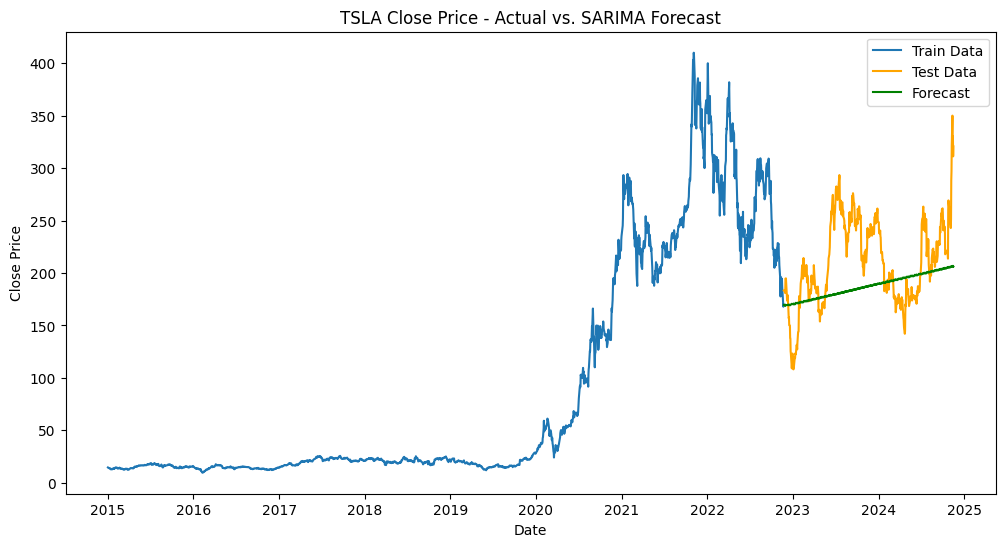

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df_TSLA_train['Close'], label='Train Data')
plt.plot(df_TSLA_test['Close'], label='Test Data', color='orange')
plt.plot(df_TSLA_test.index, sarima_forecast, label='Forecast', color='green')
plt.title("TSLA Close Price - Actual vs. SARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


Residuals (actual minus predicted values) to check for patterns

ConversionError: Failed to convert value(s) to axis units: array([Timestamp('2022-11-23 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-11-25 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-11-28 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-11-29 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-11-30 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-12-01 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-12-02 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-12-05 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-12-06 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-12-07 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-12-08 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-12-09 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-12-12 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-12-13 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-12-14 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-12-15 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-12-16 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-12-19 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-12-20 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-12-21 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-12-22 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-12-23 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-12-27 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-12-28 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-12-29 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2022-12-30 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-01-03 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-01-04 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-01-05 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-01-06 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-01-09 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-01-10 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-01-11 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-01-12 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-01-13 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-01-17 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-01-18 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-01-19 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-01-20 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-01-23 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-01-24 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-01-25 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-01-26 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-01-27 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-01-30 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-01-31 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-02-01 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-02-02 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-02-03 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-02-06 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-02-07 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-02-08 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-02-09 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-02-10 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-02-13 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-02-14 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-02-15 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-02-16 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-02-17 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-02-21 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-02-22 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-02-23 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-02-24 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-02-27 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-02-28 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-03-01 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-03-02 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-03-03 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-03-06 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-03-07 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-03-08 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-03-09 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-03-10 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-03-13 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-03-14 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-03-15 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-03-16 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-03-17 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-03-20 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-03-21 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-03-22 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-03-23 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-03-24 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-03-27 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-03-28 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-03-29 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-03-30 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-03-31 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-04-03 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-04-04 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-04-05 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-04-06 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-04-10 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-04-11 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-04-12 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-04-13 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-04-14 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-04-17 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-04-18 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-04-19 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-04-20 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-04-21 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-04-24 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-04-25 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-04-26 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-04-27 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-04-28 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-05-01 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-05-02 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-05-03 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-05-04 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-05-05 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-05-08 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-05-09 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-05-10 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-05-11 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-05-12 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-05-15 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-05-16 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-05-17 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-05-18 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-05-19 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-05-22 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-05-23 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-05-24 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-05-25 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-05-26 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-05-30 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-05-31 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-06-01 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-06-02 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-06-05 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-06-06 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-06-07 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-06-08 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-06-09 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-06-12 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-06-13 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-06-14 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-06-15 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-06-16 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-06-20 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-06-21 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-06-22 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-06-23 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-06-26 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-06-27 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-06-28 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-06-29 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-06-30 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-07-03 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-07-05 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-07-06 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-07-07 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-07-10 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-07-11 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-07-12 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-07-13 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-07-14 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-07-17 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-07-18 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-07-19 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-07-20 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-07-21 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-07-24 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-07-25 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-07-26 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-07-27 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-07-28 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-07-31 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-08-01 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-08-02 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-08-03 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-08-04 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-08-07 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-08-08 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-08-09 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-08-10 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-08-11 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-08-14 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-08-15 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-08-16 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-08-17 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-08-18 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-08-21 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-08-22 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-08-23 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-08-24 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-08-25 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-08-28 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-08-29 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-08-30 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-08-31 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-09-01 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-09-05 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-09-06 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-09-07 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-09-08 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-09-11 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-09-12 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-09-13 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-09-14 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-09-15 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-09-18 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-09-19 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-09-20 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-09-21 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-09-22 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-09-25 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-09-26 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-09-27 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-09-28 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-09-29 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-10-02 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-10-03 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-10-04 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-10-05 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-10-06 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-10-09 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-10-10 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-10-11 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-10-12 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-10-13 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-10-16 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-10-17 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-10-18 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-10-19 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-10-20 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-10-23 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-10-24 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-10-25 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-10-26 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-10-27 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-10-30 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-10-31 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-11-01 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-11-02 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-11-03 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2023-11-06 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-11-07 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-11-08 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-11-09 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-11-10 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-11-13 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-11-14 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-11-15 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-11-16 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-11-17 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-11-20 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-11-21 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-11-22 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-11-24 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-11-27 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-11-28 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-11-29 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-11-30 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-12-01 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-12-04 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-12-05 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-12-06 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-12-07 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-12-08 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-12-11 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-12-12 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-12-13 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-12-14 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-12-15 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-12-18 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-12-19 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-12-20 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-12-21 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-12-22 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-12-26 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-12-27 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-12-28 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2023-12-29 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-01-02 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-01-03 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-01-04 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-01-05 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-01-08 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-01-09 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-01-10 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-01-11 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-01-12 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-01-16 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-01-17 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-01-18 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-01-19 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-01-22 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-01-23 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-01-24 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-01-25 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-01-26 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-01-29 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-01-30 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-01-31 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-02-01 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-02-02 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-02-05 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-02-06 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-02-07 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-02-08 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-02-09 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-02-12 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-02-13 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-02-14 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-02-15 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-02-16 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-02-20 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-02-21 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-02-22 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-02-23 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-02-26 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-02-27 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-02-28 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-02-29 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-03-01 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-03-04 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-03-05 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-03-06 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-03-07 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-03-08 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-03-11 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-03-12 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-03-13 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-03-14 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-03-15 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-03-18 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-03-19 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-03-20 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-03-21 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-03-22 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-03-25 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-03-26 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-03-27 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-03-28 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-04-01 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-04-02 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-04-03 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-04-04 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-04-05 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-04-08 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-04-09 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-04-10 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-04-11 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-04-12 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-04-15 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-04-16 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-04-17 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-04-18 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-04-19 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-04-22 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-04-23 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-04-24 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-04-25 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-04-26 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-04-29 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-04-30 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-05-01 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-05-02 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-05-03 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-05-06 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-05-07 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-05-08 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-05-09 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-05-10 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-05-13 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-05-14 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-05-15 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-05-16 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-05-17 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-05-20 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-05-21 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-05-22 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-05-23 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-05-24 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-05-28 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-05-29 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-05-30 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-05-31 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-06-03 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-06-04 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-06-05 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-06-06 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-06-07 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-06-10 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-06-11 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-06-12 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-06-13 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-06-14 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-06-17 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-06-18 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-06-20 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-06-21 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-06-24 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-06-25 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-06-26 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-06-27 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-06-28 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-07-01 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-07-02 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-07-03 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-07-05 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-07-08 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-07-09 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-07-10 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-07-11 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-07-12 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-07-15 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-07-16 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-07-17 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-07-18 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-07-19 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-07-22 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-07-23 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-07-24 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-07-25 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-07-26 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-07-29 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-07-30 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-07-31 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-08-01 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-08-02 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-08-05 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-08-06 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-08-07 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-08-08 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-08-09 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-08-12 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-08-13 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-08-14 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-08-15 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-08-16 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-08-19 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-08-20 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-08-21 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-08-22 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-08-23 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-08-26 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-08-27 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-08-28 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-08-29 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-08-30 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-09-03 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-09-04 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-09-05 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-09-06 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-09-09 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-09-10 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-09-11 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-09-12 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-09-13 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-09-16 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-09-17 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-09-18 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-09-19 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-09-20 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-09-23 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-09-24 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-09-25 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-09-26 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-09-27 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-09-30 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-10-01 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-10-02 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-10-03 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-10-04 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-10-07 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-10-08 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-10-09 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-10-10 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-10-11 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-10-14 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-10-15 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-10-16 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-10-17 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-10-18 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-10-21 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-10-22 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-10-23 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-10-24 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-10-25 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-10-28 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-10-29 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-10-30 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-10-31 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-11-01 00:00:00-0400', tz='UTC-04:00'),
       Timestamp('2024-11-04 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-11-05 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-11-06 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-11-07 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-11-08 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-11-11 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-11-12 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-11-13 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-11-14 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-11-15 00:00:00-0500', tz='UTC-05:00'), 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033,
       2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044,
       2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055,
       2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066,
       2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077,
       2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088,
       2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099,
       2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110,
       2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121,
       2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132,
       2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143,
       2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154,
       2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165,
       2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176,
       2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187,
       2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198,
       2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209,
       2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220,
       2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231,
       2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239, 2240, 2241, 2242,
       2243, 2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253,
       2254, 2255, 2256, 2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264,
       2265, 2266, 2267, 2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275,
       2276, 2277, 2278, 2279, 2280, 2281, 2282, 2283, 2284, 2285, 2286,
       2287, 2288, 2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2297,
       2298, 2299, 2300, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308,
       2309, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 2317, 2318, 2319,
       2320, 2321, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330,
       2331, 2332, 2333, 2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341,
       2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 2350, 2351, 2352,
       2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362, 2363,
       2364, 2365, 2366, 2367, 2368, 2369, 2370, 2371, 2372, 2373, 2374,
       2375, 2376, 2377, 2378, 2379, 2380, 2381, 2382, 2383, 2384, 2385,
       2386, 2387, 2388, 2389, 2390, 2391, 2392, 2393, 2394, 2395, 2396,
       2397, 2398, 2399, 2400, 2401, 2402, 2403, 2404, 2405, 2406, 2407,
       2408, 2409, 2410, 2411, 2412, 2413, 2414, 2415, 2416, 2417, 2418,
       2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429,
       2430, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2439, 2440,
       2441, 2442, 2443, 2444, 2445, 2446, 2447, 2448, 2449, 2450, 2451,
       2452, 2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460, 2461, 2462,
       2463, 2464, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472, 2473,
       2474, 2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2483, 2484,
       2485], dtype=object)

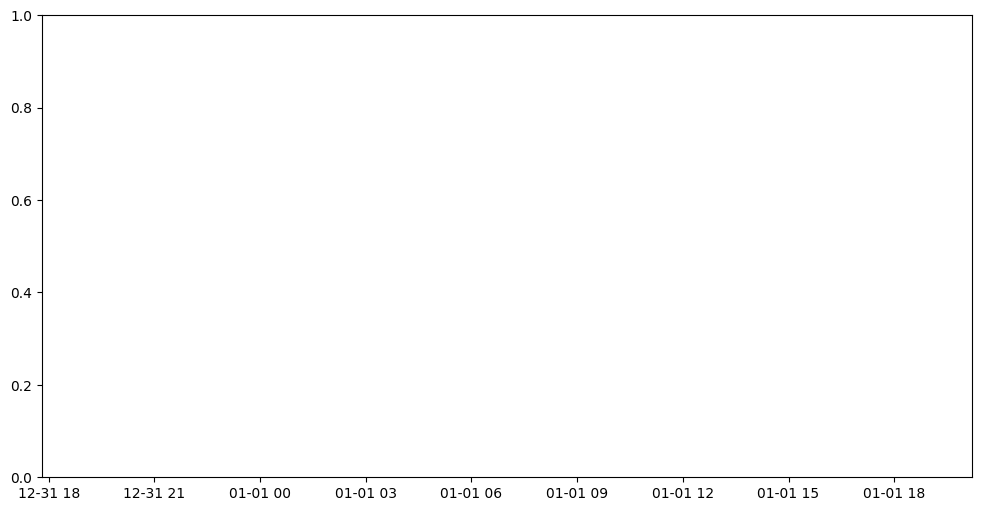

In [21]:
residuals = df_TSLA_test['Close'] - sarima_forecast
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("SARIMA Model Residuals")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()

Residual Autocorrelation (ACF) Plot

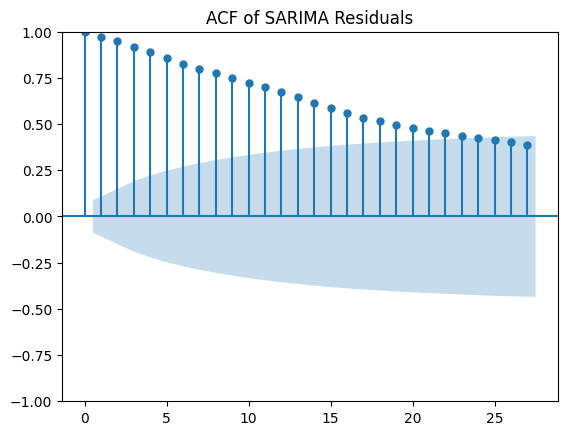

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals)
plt.title("ACF of SARIMA Residuals")
plt.show()

Displaying confidence intervals around forecasted values to provide insights into the forecast’s uncertainty.

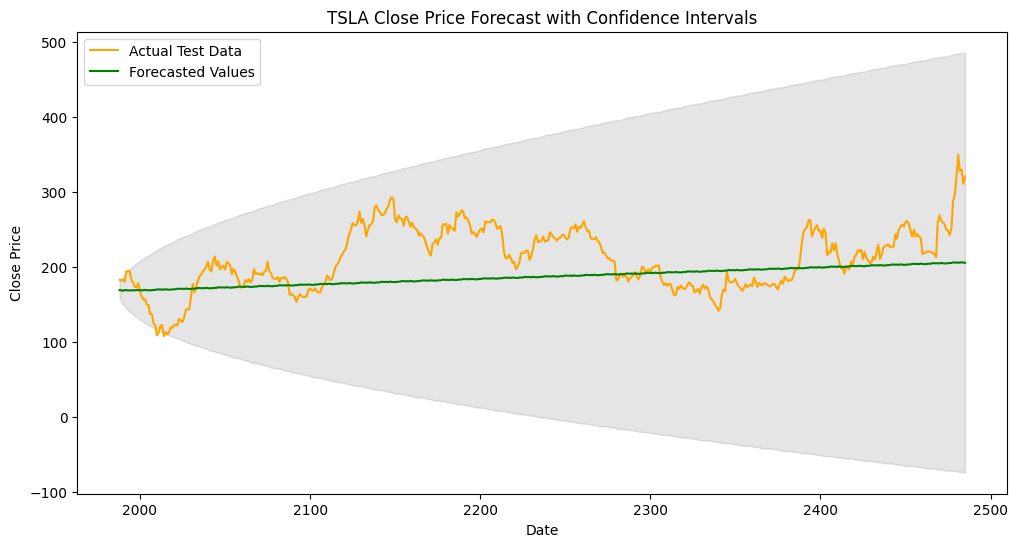

In [ ]:
sarima_forecast_ci = sarima_model_fit.get_forecast(steps=len(df_TSLA_test)).conf_int()
plt.figure(figsize=(12, 6))
plt.plot(df_TSLA_test['Close'], label="Actual Test Data", color="orange")
plt.plot(df_TSLA_test.index, sarima_forecast, label="Forecasted Values", color="green")
plt.fill_between(df_TSLA_test.index, 
                 sarima_forecast_ci.iloc[:, 0], 
                 sarima_forecast_ci.iloc[:, 1], color='k', alpha=0.1)
plt.title("TSLA Close Price Forecast with Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


seasonal decomposition

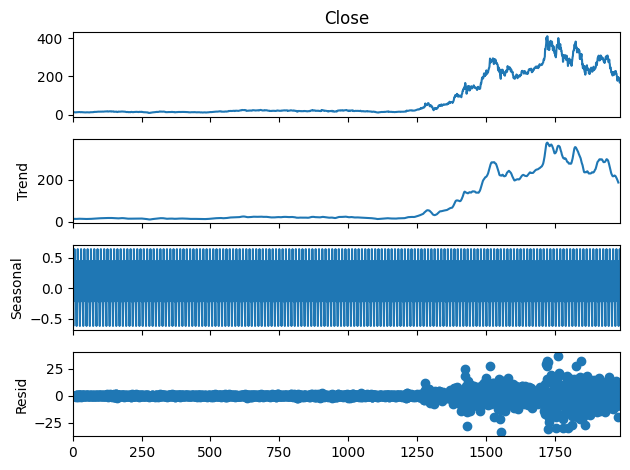

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_TSLA_train['Close'], model='additive', period=12)
decomposition.plot()
plt.show()

### LSTM Model

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize the scaler
# scaler = MinMaxScaler(feature_range=(0, 1))

# # Fit and transform the training data
# X_train_scaled = scaler.fit_transform(df_TSLA_train[['Close']].values)

# # Transform the test data
# X_test_scaled = scaler.transform(df_TSLA_test[['Close']].values)

# # Reshape for LSTM input
# X_train = X_train_scaled.reshape((len(X_train_scaled), 1, 1))
# X_test = X_test_scaled.reshape((len(X_test_scaled), 1, 1))

In [ ]:
# LSTM Model
print("Developing LSTM Model for TSLA")
lstm_model = Sequential()
lstm_model.add(LSTM(100, input_shape=(1, 1), return_sequences=True))  # Change input_shape to (1, 1)
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')  # relu

# Reshape X_train to (len(df_TSLA_train), 1, 1)
X_train = df_TSLA_train[['Close']].values.reshape((len(df_TSLA_train), 1, 1))
y_train = df_TSLA_train['Close'].values

# Train the model
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Reshape X_test to (len(df_TSLA_test), 1, 1)
X_test = df_TSLA_test[['Close']].values.reshape((len(df_TSLA_test), 1, 1))
lstm_forecast = lstm_model.predict(X_test)

# Evaluate the model
lstm_mae = mean_absolute_error(df_TSLA_test['Close'], lstm_forecast.flatten())
lstm_rmse = np.sqrt(mean_squared_error(df_TSLA_test['Close'], lstm_forecast.flatten()))
lstm_mape = mean_absolute_percentage_error(df_TSLA_test['Close'], lstm_forecast.flatten())

print(f"LSTM Model Performance:")
print(f"MAE: {lstm_mae:.2f}")
print(f"RMSE: {lstm_rmse:.2f}")
print(f"MAPE: {lstm_mape:.2f}%")


Developing LSTM Model for TSLA
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
LSTM Model Performance:
MAE: 119.46
RMSE: 126.29
MAPE: 0.55%


LSTM Actual vs. Forecasted Plot

ValueError: x and y can be no greater than 2D, but have shapes (498,) and (498, 1, 1)

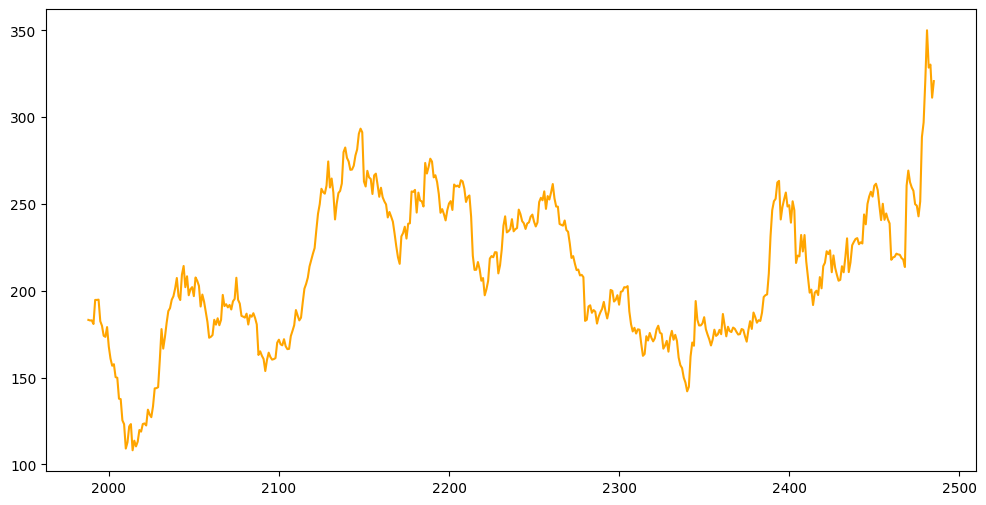

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_TSLA_test.index, df_TSLA_test['Close'], label="Actual Test Data", color="orange")
plt.plot(df_TSLA_test.index, lstm_forecast, label="LSTM Forecast", color="green")
plt.title("TSLA Close Price - Actual vs. LSTM Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

LSTM Loss Curve 

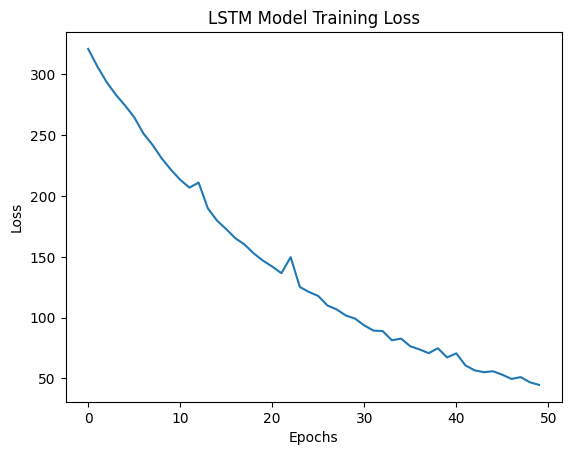

In [ ]:
history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
plt.plot(history.history['loss'])
plt.title('LSTM Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

LSTM Residual Plot 

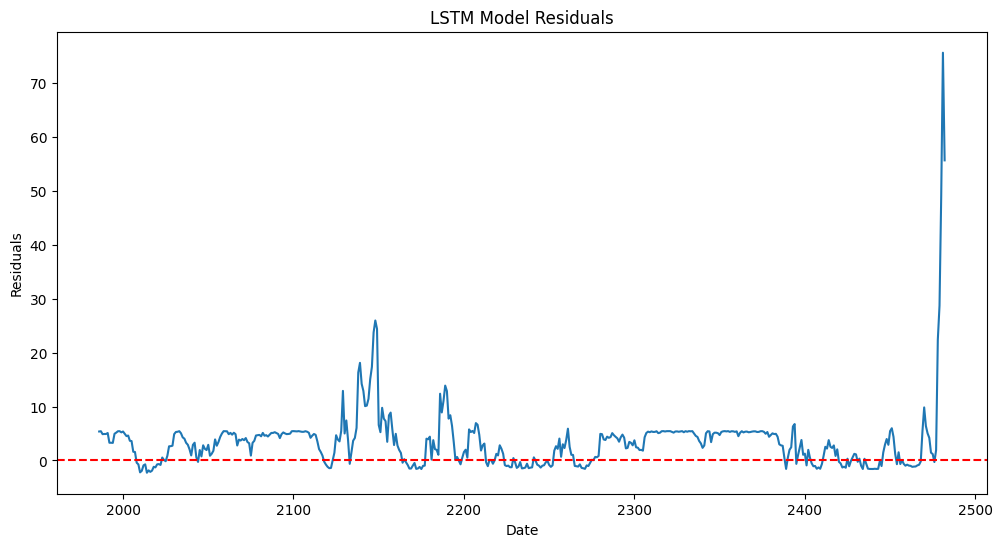

In [ ]:
lstm_residuals = df_TSLA_test['Close'] - lstm_forecast.flatten()
plt.figure(figsize=(12, 6))
plt.plot(lstm_residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("LSTM Model Residuals")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()

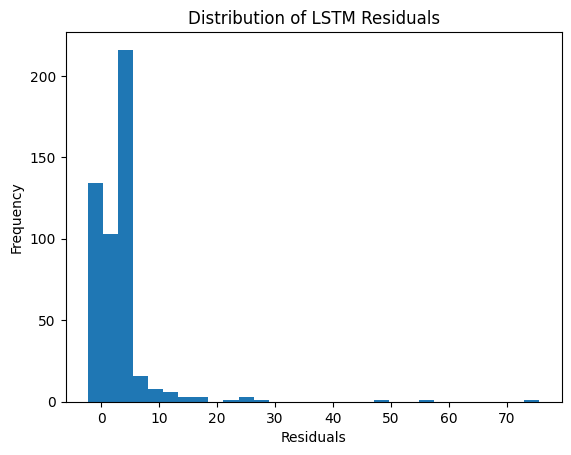

In [ ]:
plt.hist(lstm_residuals, bins=30)
plt.title("Distribution of LSTM Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

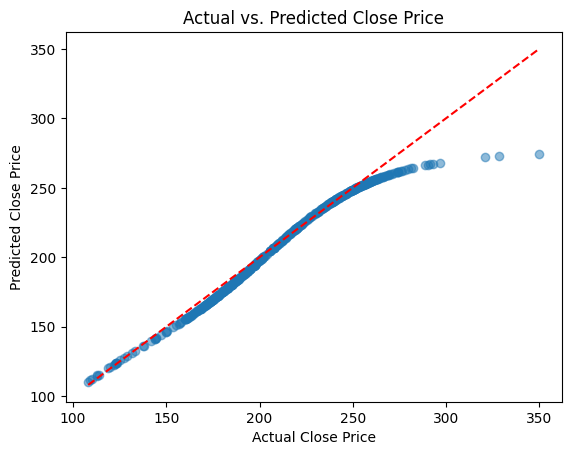

In [ ]:
plt.scatter(df_TSLA_test['Close'], lstm_forecast.flatten(), alpha=0.5)
plt.plot([df_TSLA_test['Close'].min(), df_TSLA_test['Close'].max()], 
         [df_TSLA_test['Close'].min(), df_TSLA_test['Close'].max()], 'r--')
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs. Predicted Close Price")
plt.show()

### Model Performance Comparison 

In [ ]:
# Compare Model Performance
print("Comparing Model Performance:")
print(f"ARIMA MAE: {arima_mae:.2f}, RMSE: {arima_rmse:.2f}, MAPE: {arima_mape:.2f}%")
print(f"SARIMA MAE: {sarima_mae:.2f}, RMSE: {sarima_rmse:.2f}, MAPE: {sarima_mape:.2f}%")
print(f"LSTM MAE: {lstm_mae:.2f}, RMSE: {lstm_rmse:.2f}, MAPE: {lstm_mape:.2f}%")

Comparing Model Performance:
ARIMA MAE: 39.20, RMSE: 49.76, MAPE: 0.18%
SARIMA MAE: 32.50, RMSE: 40.29, MAPE: 0.15%
LSTM MAE: 3.97, RMSE: 6.90, MAPE: 0.02%


In [ ]:
# Select the best model based on performance metrics
if arima_mape < sarima_mape and arima_mape < lstm_mape:
    best_model = "ARIMA"
    best_forecast = arima_forecast
elif sarima_mape < arima_mape and sarima_mape < lstm_mape:
    best_model = "SARIMA"
    best_forecast = sarima_forecast
else:
    best_model = "LSTM"
    best_forecast = lstm_forecast.flatten()

print(f"The best model is {best_model} based on MAPE.")

The best model is LSTM based on MAPE.


The best model is LSTM based on MAPE.


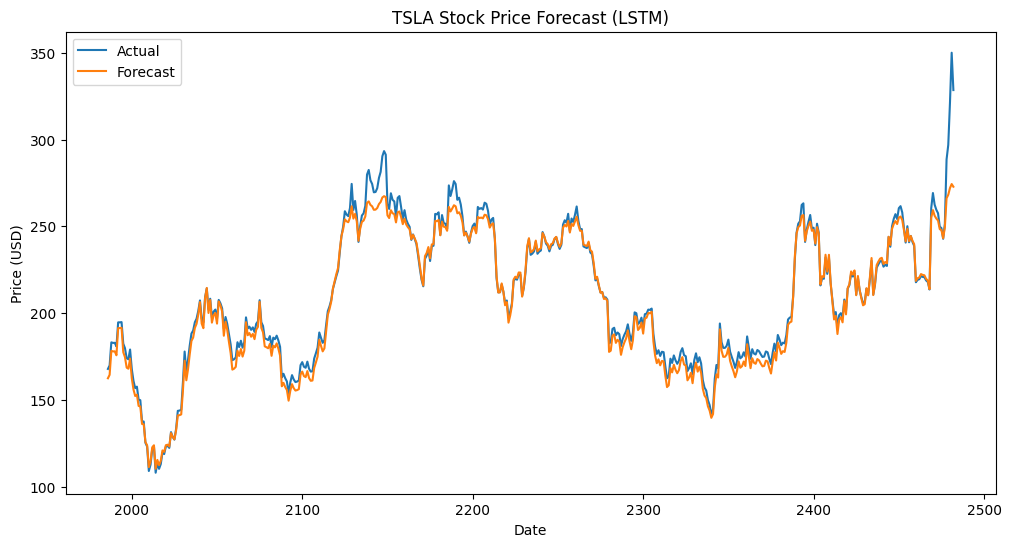

In [ ]:
print(f"The best model is {best_model} based on MAPE.")

# Visualize the forecasts
plt.figure(figsize=(12, 6))
plt.plot(df_TSLA_test.index, df_TSLA_test['Close'], label='Actual')
plt.plot(df_TSLA_test.index, best_forecast, label='Forecast')
plt.title(f"TSLA Stock Price Forecast ({best_model})")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()